### import numpy and pandas to get started

In [265]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import re

### Preprocessing (28 pts)

In [266]:
goog_store = pd.read_excel("GooglePlaystore.xlsx")

1. [3 pts] Often there are outliers which do not match the overall data type. There is one record in this data where the "Reviews" has value "3.0M" which does not match the rest of the data. Remove that record.

In [267]:
goog_store = goog_store[goog_store["Reviews"]!="3.0M"]

2. [4 pts] Remove rows where any of the columns has the value "Varies with device".

In [268]:
goog_store = goog_store[~goog_store.isin(["Varies with device"]).any(axis=1)]

3. [5 pts] The values in the Android version column should be float. Strip the trailing non-numeric characters from all values, so the result is a number. For example value "4.0 and up" should be changed to "4.0"

In [269]:
goog_store["Android Ver"] = goog_store["Android Ver"].apply(lambda ver: re.sub(r"^[^\d]*|[^\d]*$", "", str(ver)))

4. [5 pts] The "Installs" column must have integer values. For values that have commas, remove the commas. For values that have a '+' at the end, remove the '+'. Keep only those rows that have an integer value after these edits.

In [270]:
goog_store["Installs"] = goog_store["Installs"].apply(lambda inst: re.sub(r"[,+]", "", inst))
goog_store["Installs"] = goog_store["Installs"].apply(lambda inst: int(inst))

5. [5 pts] For missing rating values, if the number of reviews is less than 100 and installations is less than 50000, remove the row. Else, fill the missing value with the average value (rounded to 2 decimal places) for the Category of that row. 

In [271]:
missing_ratings = goog_store[goog_store["Rating"].isna()]
missing_ratings = missing_ratings[(missing_ratings["Reviews"] < 100) & (missing_ratings["Installs"] < 50000)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,10000,Free,0,Mature 17+,Beauty,2017-08-08 00:00:00,2,2.3
130,Recipes and tips for losing weight,BEAUTY,NaN,35,3.1M,10000,Free,0,Everyone 10+,Beauty,2017-12-11 00:00:00,2,3.0
134,"Lady adviser (beauty, health)",BEAUTY,NaN,30,9.9M,10000,Free,0,Mature 17+,Beauty,2018-01-24 00:00:00,3,3.0
478,Truth or Dare Pro,DATING,NaN,0,20M,50,Paid,1.49,Teen,Dating,2017-09-01 00:00:00,1,4.0
479,"Private Dating, Hide App- Blue for PrivacyHider",DATING,NaN,0,18k,100,Paid,2.99,Everyone,Dating,2017-07-25 00:00:00,1.0.1,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,10000,Free,0,Everyone,Medical,2018-07-31 00:00:00,2.2.2,4.4
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100,Free,0,Teen,Social,2018-02-02 00:00:00,1,4.0
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,5000,Free,0,Everyone,Maps & Navigation,2018-06-13 00:00:00,2.0.148.0,4.0
10835,FR Forms,BUSINESS,NaN,0,9.6M,10,Free,0,Everyone,Business,2016-09-29 00:00:00,1.1.5,4.0


In [272]:
goog_store = goog_store.drop(missing_ratings.index)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0.3
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0.3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0.3
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000,Free,0,Everyone,Art & Design,2017-03-26 00:00:00,1,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10832,FR Tides,WEATHER,3.8,1195,582k,100000,Free,0,Everyone,Weather,2014-02-16 00:00:00,6,2.1
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,1000,Free,0,Everyone,Books & Reference,2014-03-23 00:00:00,0.8,2.2
10834,FR Calculator,FAMILY,4.0,7,2.6M,500,Free,0,Everyone,Education,2017-06-18 00:00:00,1.0.0,4.1
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0,Everyone,Education,2017-07-25 00:00:00,1.48,4.1


In [275]:
list_categories = goog_store["Category"].unique()

In [287]:
cat_to_avg_dict = {}
for category in list_categories:
    avg = goog_store.loc[(goog_store["Category"]==category) & (~goog_store["Rating"].isna()), "Rating"].mean()
    avg = round(avg, 2)
    cat_to_avg_dict[category] = avg

In [292]:
for category in list_categories:
    goog_store.loc[(goog_store["Category"]==category) & (goog_store["Rating"].isna()), "Rating"] = cat_to_avg_dict[category]

6. [6 pts] Preprocess the Size column to convert the "M" (millions) and "K" (thousands) values into integers. For instance, 8.7M should be converted to 8700000 and 2.4K should be converted to 2400.

In [326]:
goog_store["Size"] = goog_store["Size"].replace({'[kK]': '*1e3', '[mM]': '*1e6'}, regex=True).map(pd.eval).astype(int)

### Analysis (19 pts)

1. [4 pts] Describe (use DataFrame describe method) the category wise rating statistics. In other words, for each category, describe the statistics (count, mean, etc.) for ratings in that category. 

In [340]:
descript_dict = {}
for category in list_categories:
    descript_dict[category] = goog_store.loc[goog_store["Category"]==category, "Rating"].describe()
rating_stats = DataFrame(descript_dict)
rating_stats

,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,DATING,EDUCATION,ENTERTAINMENT,...,SPORTS,TRAVEL_AND_LOCAL,TOOLS,PERSONALIZATION,PRODUCTIVITY,PARENTING,WEATHER,VIDEO_PLAYERS,NEWS_AND_MAGAZINES,MAPS_AND_NAVIGATION
count,61.000000,74.000000,47.000000,197.000000,399.000000,50.000000,263.000000,212.000000,110.000000,86.000000,...,311.000000,187.000000,736.000000,352.000000,299.000000,54.000000,55.000000,128.000000,215.000000,107.000000
mean,4.358689,4.147297,4.291489,4.320102,4.119499,4.154000,4.100760,3.958208,4.392636,4.145349,...,4.203859,4.029733,4.010530,4.321591,4.140535,4.348148,4.242545,4.029297,4.141302,4.003738
std,0.359182,0.520990,0.327958,0.391045,0.519857,0.544719,0.448917,0.601428,0.254395,0.291308,...,0.416651,0.506535,0.591825,0.326494,0.511995,0.373909,0.329423,0.560045,0.523059,0.521414
min,3.200000,2.100000,3.100000,2.700000,1.000000,2.800000,1.000000,1.000000,3.500000,3.000000,...,1.500000,2.200000,1.000000,2.500000,1.000000,3.100000,3.300000,1.800000,1.700000,1.900000
25%,4.100000,4.000000,4.100000,4.200000,4.120000,3.825000,4.000000,3.800000,4.300000,4.000000,...,4.100000,3.900000,3.900000,4.200000,4.100000,4.100000,4.150000,3.800000,4.000000,3.750000
50%,4.400000,4.150000,4.290000,4.320000,4.120000,4.350000,4.100000,4.000000,4.400000,4.200000,...,4.200000,4.100000,4.100000,4.320000,4.140000,4.375000,4.240000,4.100000,4.140000,4.100000
75%,4.700000,4.500000,4.500000,4.600000,4.400000,4.575000,4.300000,4.300000,4.600000,4.300000,...,4.450000,4.400000,4.400000,4.500000,4.400000,4.600000,4.500000,4.400000,4.500000,4.350000
max,5.000000,4.900000,4.900000,5.000000,5.000000,5.000000,5.000000,5.000000,4.900000,4.700000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.800000,4.900000,5.000000,4.900000


2. [11 pts] Extract all "Free" apps from the master data frame. Then write a function that, given a numeric column e.g 'Rating'), will create and return a dataframe for the top 3 free applications in each category based on that column. Call the function on each of these columns:

    Rating (gives top 3 most highly rated applications in each category)

    Installs (gives top 3 most installed applications in each category)

    Reviews (gives top 3 most reviewed applications in each category) 

You don't need to do anything explicit to break ties.

Each of the returned dataframes have Category and App for the first two columns, and one of Rating (for a.), Installs (for b.), and Reviews (for c.) as the third column, as for instance: 

In [341]:
free_apps = goog_store[goog_store["Type"]=="Free"]
free_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159,19000000,10000,Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0.3
1,Coloring book moana,ART_AND_DESIGN,3.90,967,14000000,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0.3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,87510,8700000,5000000,Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0.3
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30,967,2800000,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4
5,Paper flowers instructions,ART_AND_DESIGN,4.40,167,5600000,50000,Free,0,Everyone,Art & Design,2017-03-26 00:00:00,1,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.00,7,2600000,500,Free,0,Everyone,Education,2017-06-18 00:00:00,1.0.0,4.1
10835,FR Forms,BUSINESS,4.12,0,9600000,10,Free,0,Everyone,Business,2016-09-29 00:00:00,1.1.5,4.0
10836,Sya9a Maroc - FR,FAMILY,4.50,38,53000000,5000,Free,0,Everyone,Education,2017-07-25 00:00:00,1.48,4.1
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.00,4,3600000,100,Free,0,Everyone,Education,2018-07-06 00:00:00,1,4.1


In [351]:
def extract_col(column_name, app_df):
    list_categories = app_df["Category"].unique()
    frames = []
    for category in list_categories:
        frame = app_df[app_df["Category"]==category].sort_values(column_name, ascending=False)[:3][["App", "Category", column_name]]
        frames.append(frame)
    return pd.concat(frames)

In [352]:
extract_col("Rating", free_apps)

,App,Category,Rating
8888,Spring flowers theme couleurs d t space,ART_AND_DESIGN,5.0
5254,AJ Styles HD Wallpapers,ART_AND_DESIGN,4.8
3982,Cardi B Wallpaper,ART_AND_DESIGN,4.8
61,CDL Practice Test 2018 Edition,AUTO_AND_VEHICLES,4.9
4120,MHD F-Series,AUTO_AND_VEHICLES,4.9
...,...,...,...
10266,Noticias FC Barcelona,NEWS_AND_MAGAZINES,5.0
8395,DG TV,NEWS_AND_MAGAZINES,5.0
6023,Tour BD (Bahir Dar Map),MAPS_AND_NAVIGATION,4.9
3848,GPS Speedometer and Odometer,MAPS_AND_NAVIGATION,4.8


In [353]:
extract_col("Installs", free_apps)

,App,Category,Installs
19,ibis Paint X,ART_AND_DESIGN,10000000
12,Tattoo Name On My Photo Editor,ART_AND_DESIGN,10000000
45,"Canva: Poster, banner, card maker & graphic de...",ART_AND_DESIGN,10000000
8289,AutoScout24 - used car finder,AUTO_AND_VEHICLES,10000000
70,Fines of the State Traffic Safety Inspectorate...,AUTO_AND_VEHICLES,5000000
...,...,...,...
3816,Google News,NEWS_AND_MAGAZINES,1000000000
9844,Google News,NEWS_AND_MAGAZINES,1000000000
3828,GPS Navigation & Offline Maps Sygic,MAPS_AND_NAVIGATION,50000000
3823,"Yahoo! transit guide free timetable, operation...",MAPS_AND_NAVIGATION,10000000


In [354]:
extract_col("Reviews", free_apps)

,App,Category,Reviews
19,ibis Paint X,ART_AND_DESIGN,224399
18,FlipaClip - Cartoon animation,ART_AND_DESIGN,194216
45,"Canva: Poster, banner, card maker & graphic de...",ART_AND_DESIGN,174531
79,Tickets + PDA 2018 Exam,AUTO_AND_VEHICLES,197136
8289,AutoScout24 - used car finder,AUTO_AND_VEHICLES,186648
...,...,...,...
3816,Google News,NEWS_AND_MAGAZINES,877643
3765,Google News,NEWS_AND_MAGAZINES,877635
3828,GPS Navigation & Offline Maps Sygic,MAPS_AND_NAVIGATION,1421884
3852,Grab Driver,MAPS_AND_NAVIGATION,301413


3. [4 pts] Find the average, maximum and minimum price of the paid applications.

In [355]:
paid_apps = goog_store[goog_store["Type"]=="Paid"]
paid_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.70,11442,6800000,100000,Paid,4.99,Everyone,Business,2018-03-25 00:00:00,1.5.2,4.0
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.80,10295,39000000,100000,Paid,4.99,Everyone,Business,2017-04-11 00:00:00,3.4.6,3.0
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.70,11442,6800000,100000,Paid,4.99,Everyone,Business,2018-03-25 00:00:00,1.5.2,4.0
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.80,10295,39000000,100000,Paid,4.99,Everyone,Business,2017-04-11 00:00:00,3.4.6,3.0
477,Calculator,DATING,2.60,57,6200000,1000,Paid,6.99,Everyone,Dating,2017-10-25 00:00:00,1.1.6,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10735,FP VoiceBot,FAMILY,4.19,17,157000,100,Paid,0.99,Mature 17+,Entertainment,2015-11-25 00:00:00,1.2,2.1
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.40,35,2400000,1000,Paid,7.99,Everyone,Health & Fitness,2018-08-08 00:00:00,1.9.3,4.2
10782,Trine 2: Complete Story,GAME,3.80,252,11000000,10000,Paid,16.99,Teen,Action,2015-02-27 00:00:00,2.22,5.0
10785,"sugar, sugar",FAMILY,4.20,1405,9500000,10000,Paid,1.2,Everyone,Puzzle,2018-06-05 00:00:00,2.7,2.3


In [367]:
paid_stats_df = DataFrame.from_dict({'average': paid_apps["Price"].mean(axis=0), "maximum": paid_apps["Price"].max(axis=0), "minimum": paid_apps["Price"].min(axis=0)}, orient="index", columns=["Paid Apps Price Stats"])

In [368]:
paid_stats_df

,Paid Apps Price Stats
average,15.03773
maximum,400.00000
minimum,0.99000


### Visualization (16 pts)

1. [9 pts] In the genre column, break the string of genres into a list. For example, ‘Art & Design, Creativity’ should be [‘Art & Design’, Creativity’].

    Count the number of applications per genre and display it using a pie chart.
    Hint: Read about DataFrame.explode() 

In [372]:
goog_store["Genres"] = goog_store["Genres"].apply(lambda gen: gen.split(";"))

In [380]:
exploded_store = goog_store.explode("Genres")

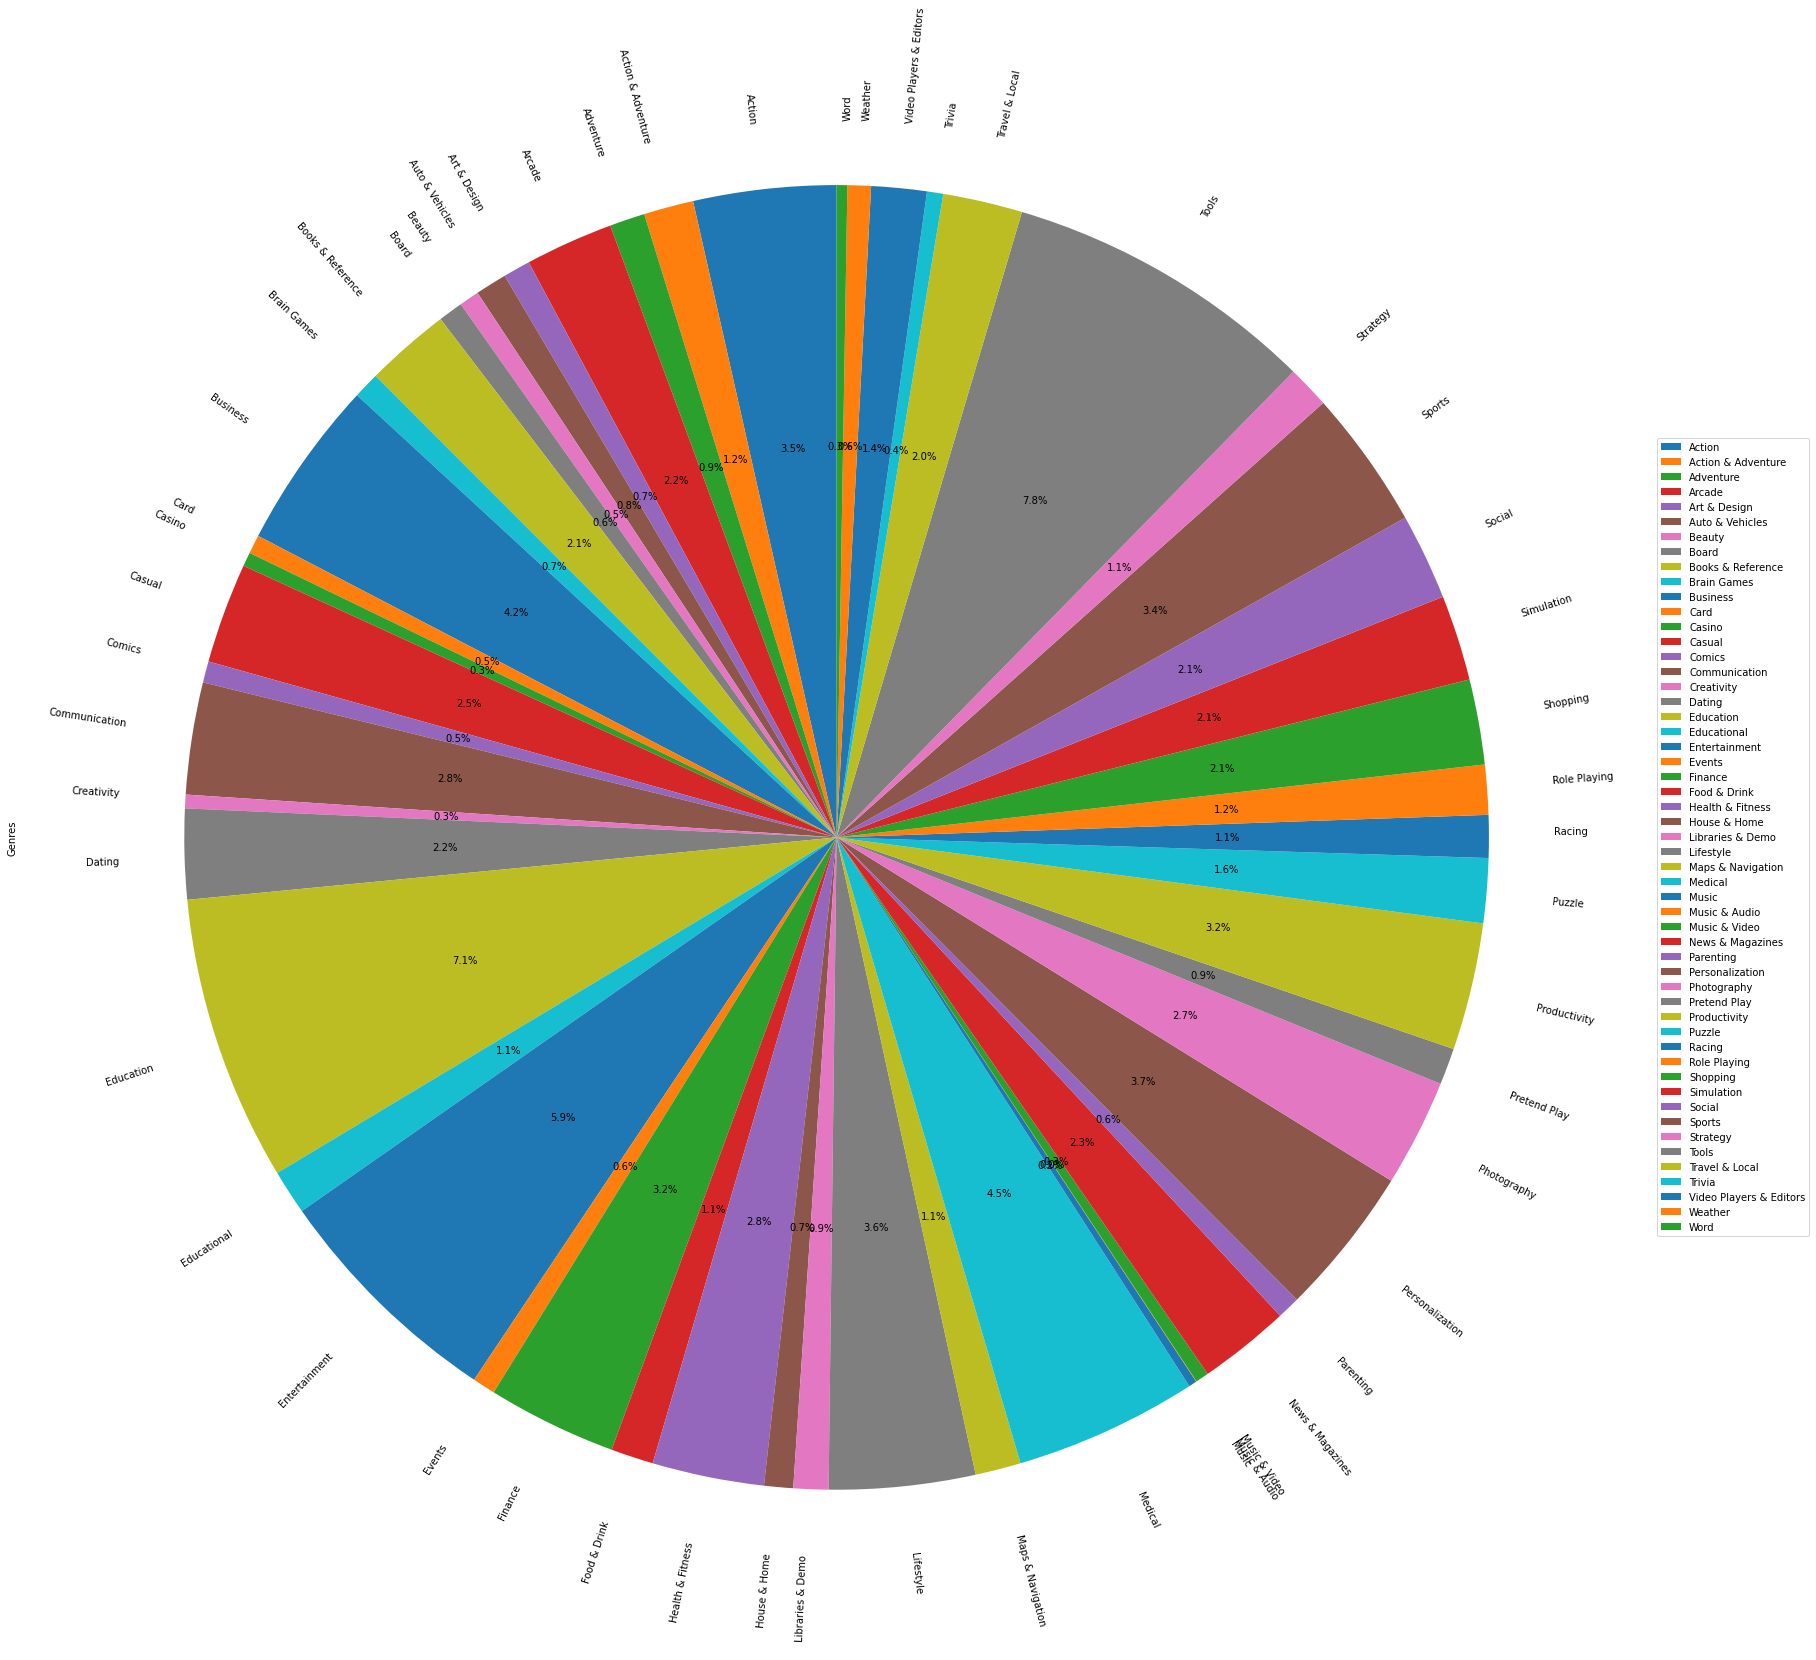

In [419]:
pie_chart = exploded_store.groupby(["Genres"]).size().plot.pie(figsize=(30,30), autopct="%1.1f%%", startangle=90, rotatelabels=True)
pie_chart.set_ylabel("Genres")
pie_chart.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))

In [420]:
bus_and_edu = goog_store[(goog_store["Category"]=="BUSINESS") | (goog_store["Category"]=="EDUCATION")]
bus_and_edu

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
190,ADP Mobile Solutions,BUSINESS,4.30,85185,29000000,5000000,Free,0,Everyone,[Business],2018-07-17 00:00:00,3.4.2,5.0
194,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.30,1002861,35000000,100000000,Free,0,Everyone,[Business],2018-08-02 00:00:00,9.7.14188,4.1
195,USPS MOBILE®,BUSINESS,3.90,16589,9100000,1000000,Free,0,Everyone,[Business],2018-06-14 00:00:00,4.9.10,4.0.3
196,Job Search by ZipRecruiter,BUSINESS,4.80,148945,25000000,1000000,Free,0,Everyone,[Business],2018-07-19 00:00:00,5.2.8,5.0
197,Curriculum vitae App CV Builder Free Resume Maker,BUSINESS,4.50,4458,3900000,500000,Free,0,Everyone,[Business],2018-07-08 00:00:00,3.3,4.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10772,FQ Load Board for Transporters,BUSINESS,4.12,0,3900000,100,Free,0,Everyone,[Business],2018-02-16 00:00:00,1.1.3,5.0
10810,Fr Lupupa Sermons,BUSINESS,4.80,19,21000000,100,Free,0,Everyone,[Business],2018-06-12 00:00:00,1,4.4
10813,DICT.fr Mobile,BUSINESS,4.12,20,2700000,10000,Free,0,Everyone,[Business],2018-07-17 00:00:00,2.1.10,4.1
10816,FieldBi FR Offline,BUSINESS,4.12,2,6800000,100,Free,0,Everyone,[Business],2018-08-06 00:00:00,2.1.8,4.1


<AxesSubplot:title={'center':'Rating'}, xlabel='Category'>

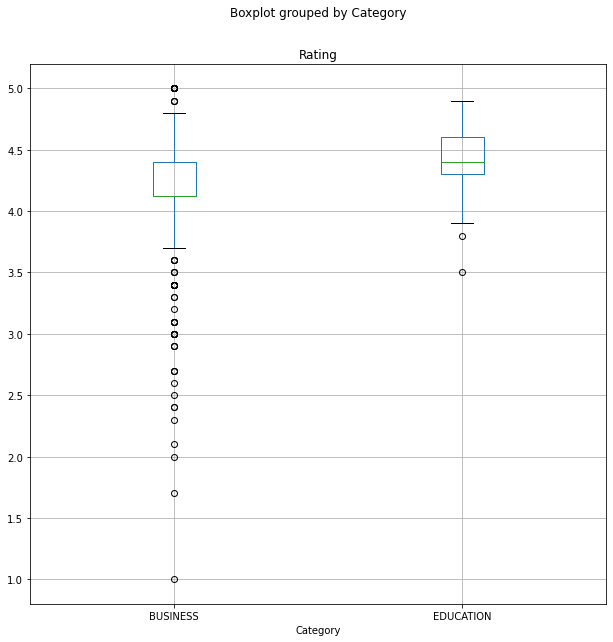

In [436]:
#bus_and_edu.groupby(["Category"]).plot.box()
bus_and_edu.boxplot(by="Category", column=["Rating"], figsize=(10,10))